In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

In [2]:
def mix(x, y, a):
    return x * (1.0 - a) + y * a

In [3]:
def show_brdf(kd, ks, f, d='y', n=1000, animate=False):
    normal = np.array([0.0, 1.0, 0.0])
    u = np.cross(np.array([0.0, 1.0, 0.0]) if abs(normal[0]) > .1 else np.array([1.0, 0.0, 0.0]), normal)
    v = np.cross(normal, u)

    ds = []
    b = kd#mix(kd, ks, f)
    for i in range(n):
        r1 = np.random.rand() * b
        phi = 2.0 * 3.14159265359 * np.random.rand() * b

        sin_t = math.sqrt(r1)
        cos_t = math.sqrt(1.0 - r1)

        d = v * float(sin_t) * math.cos(phi) + u * math.sin(phi) * float(sin_t) + normal * float(cos_t)
        d = d / np.linalg.norm(d)

        ds.append([d[0], d[1], d[2]])

    X, Y, Z = zip(*ds)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.quiver( [0], [0], [0], [normal[0]], [normal[1]], [normal[2]])
    ax.quiver( [0], [0], [0], [u[0]], [u[1]], [u[2]])
    ax.quiver( [0], [0], [0], [v[0]], [v[1]], [v[2]])
        
    ax.scatter(X, Y, Z, zdir='x', c= 'red', alpha=0.6)

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    plt.show()

    if animate:
        def init():
            ax.scatter(X, Y, Z, zdir='x', c= 'red', alpha=0.6)
            return fig,

        def animate(i):
            ax.view_init(elev=10., azim=i)
            return fig,

        anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
        return anim

#def animate(anim):
#    HTML(anim.to_html5_video())

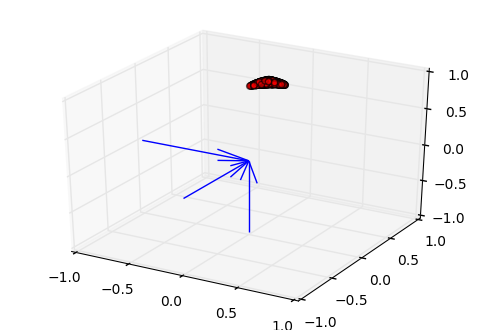

In [4]:
anim = show_brdf(0.1, 0.5, 0.1, animate=False)

In [54]:
HTML(anim.to_html5_video())